# CNN MODEL FOR DIGIT RECOGNITION 
- trained with 10 000 samples images from the MNIST dataset


In [94]:
from IPython.display import Image
from datetime import datetime
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [95]:
#loading features and labels
features = np.load("C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/SAVED NUMPY ARRAYS/MNIST_features_v1.npy")
label = np.load("C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/SAVED NUMPY ARRAYS/MNIST_label_v1.npy")

#model init
features = features/255.0
n_classes = len(set(label))
layer_sizes = [32,64,128]
dense_layer_options = [0,1,2]
conv_layer_options = [1,2,3]
kernel_options = [(2,2),(3,3),(4,4)]


version_index = 0
NAME_LIST_DEBUG = []
print(label.shape)
print(features.shape)

(10000,)
(10000, 28, 28, 1)


### DYNAMIC MODEL CONFIGURATION - QUICK DEBUGGING

In [96]:
# 3 parameters with 3 possibility to adjust, this, is giving us a 3x3x3 for loop
now = datetime.now()
timestamp = now.strftime("%d-%m-%Y_%H-%M-%S")


for dense_layer in dense_layer_options:
    for n_node in layer_sizes:
        for conv_layer in conv_layer_options:
            name = "mnist-digit-recog-cnn_{}-conv-{}-nodes-{}-dense_{}-timestamp".format(conv_layer, n_node, dense_layer, timestamp)
            NAME_LIST_DEBUG.append(name)
            
     

            
print("number of models to train: ",len(NAME_LIST_DEBUG))
print("first name of the list: ", NAME_LIST_DEBUG[0])

number of models to train:  27
first name of the list:  mnist-digit-recog-cnn_1-conv-32-nodes-0-dense_16-04-2020_23-37-19-timestamp


### DYNAMIC CONFIGURATION RESEARCH - TRAINING


In [97]:
 
for dense_layer in dense_layer_options:
    for n_node in layer_sizes:
        for conv_layer in conv_layer_options:
            
            
            #INITIALIZATION
            #setting up the name of the model with the current date (dd/mm/YY H:M:S)
            now = datetime.now()
            timestamp = now.strftime("%d-%m-%Y_%H-%M")
            name = "mnist_digit_recog_cnn_{}-conv-{}-nodes-{}-dense-{}_Ver{}".format(conv_layer, n_node, dense_layer, timestamp, str(version_index))
            version_index += 1

            #defining path of the future saved model
            model_path ="C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/saved model/"
            model_name = ("{}{}.h5".format(model_path, name))

            #model initilization
            tensorboard = TensorBoard(log_dir="C:\\logs\\train\\{}".format(name))
            model = Sequential()
            
            #debug
            print("name", model_name)

            
            
            
            
            #1st Convolutional layer - this is the input layer
            model.add(Conv2D(n_node, (3,3), input_shape = features.shape[1:])) # (3,3) here is the kernel size(or feature detector)
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size = (2,2)))

            
            
            #iterates through our different convolutional layer configurations
            for layer in range(conv_layer - 1): # -1 cuz we already created one above               
                model.add(Conv2D(n_node, (3,3)))        # we put 'n_node' here, but it might be the number of features to detect
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size = (2,2)))

                
            
            #we flatten the image before feeding it to the fully-connected Neural Networks
            model.add(Flatten())

          
        
             #fully connected  layer   
            for layer in range(dense_layer):
                model.add(Dense(n_node))
                model.add(Activation("relu"))
                model.add(Dropout(0.3))

                
            #final output layer     
            model.add(Dense(n_classes, activation='softmax'))


            
            
            model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

            model.fit(features, label, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])

            model.save(model_name)
print("done.")



name C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/saved model/mnist_digit_recog_cnn_1-conv-32-nodes-0-dense-16-04-2020_23-37_Ver0.h5
Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 3s 325us/sample - loss: 0.5483 - accuracy: 0.8497 - val_loss: 0.3188 - val_accuracy: 0.9015
Epoch 2/20
8000/8000 [==============================] - 2s 270us/sample - loss: 0.2464 - accuracy: 0.9279 - val_loss: 0.2300 - val_accuracy: 0.9255
Epoch 3/20
8000/8000 [==============================] - 2s 257us/sample - loss: 0.1712 - accuracy: 0.9511 - val_loss: 0.1830 - val_accuracy: 0.9470
Epoch 4/20
8000/8000 [==============================] - 2s 310us/sample - loss: 0.1273 - accuracy: 0.9644 - val_loss: 0.1514 - val_accuracy: 0.9545
Epoch 5/20
8000/8000 [==============================] - 2s 306us/sample - loss: 0.0990 - accuracy: 0.9729 - val_loss: 0.1288 - val_accuracy: 0.9650
Epoch 6/20
8000/8000 [==============================] - 2s 278us/sample 

# RESULT

## ACCURACY 
- 2 convolutions
- 64 nodes
- 2 dense layers 
#### seems to be the best configurations among the 27 existing.
###### (top 3 are display below)




### model accuracy:  ~ 98%
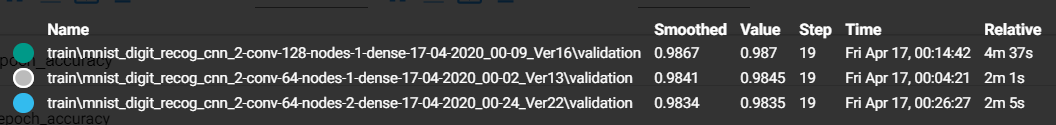


## LOSS



### model loss:          ~ 0.07%
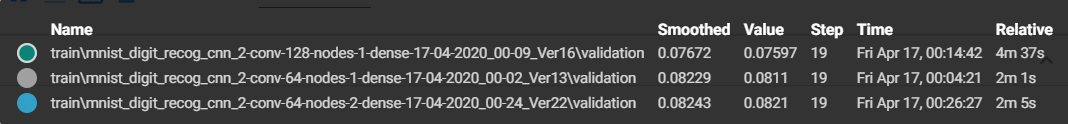



### STATIC MODEL CONFIGURATION

In [98]:
#features shape is (10 000, 28, 28, 1) - 10 000 images of 28x28 pixels with one color channel wich is grayscale

"""

#model initilization
#setting up the name of the model with the current date (dd/mm/YY H:M:S)
now = datetime.now()
timestamp = now.strftime("%d-%m-%Y_%H-%M-%S")

#saving the model into logs 
name = "mnist_digit_recognition_cnn_{}".format(timestamp)
tensorboard = TensorBoard(log_dir="C:\\logs\\train\\{}".format(name))
model = Sequential()
print("name", name)


#1st Convolutional layer - this is the input layer
model.add(Conv2D(64, (3,3), input_shape = features.shape[1:])) # (3,3) here is the kernel size(or feature detector)
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))


#2nd Convolutional layer 
model.add(Conv2D(64, (3,3)))       
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))



#we flatten the image before feeding it to the fully-connected Neural Networks
model.add(Flatten())



#fully connected  layer   
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.3))

#final output layer     
model.add(Dense(n_classes, activation='softmax'))


model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

model.fit(features, label, batch_size=32, epochs=20, validation_split=0.2, callbacks=[tensorboard])

model_path ="C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/saved model/"
model_name = ("{}{}.h5".format(model_path, name))
model.save(model_name)

"""

'\n\n#model initilization\n#setting up the name of the model with the current date (dd/mm/YY H:M:S)\nnow = datetime.now()\ntimestamp = now.strftime("%d-%m-%Y_%H-%M-%S")\n\n#saving the model into logs \nname = "mnist_digit_recognition_cnn_{}".format(timestamp)\ntensorboard = TensorBoard(log_dir="C:\\logs\\train\\{}".format(name))\nmodel = Sequential()\nprint("name", name)\n\n\n#1st Convolutional layer - this is the input layer\nmodel.add(Conv2D(64, (3,3), input_shape = features.shape[1:])) # (3,3) here is the kernel size(or feature detector)\nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size = (2,2)))\n\n\n#2nd Convolutional layer \nmodel.add(Conv2D(64, (3,3)))       \nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size = (2,2)))\n\n\n\n#we flatten the image before feeding it to the fully-connected Neural Networks\nmodel.add(Flatten())\n\n\n\n#fully connected  layer   \nmodel.add(Dense(64))\nmodel.add(Activation("relu"))\nmodel.add(Dropout(0.3))\n\nmodel.add(De